# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


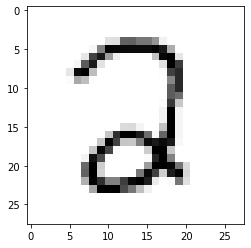

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2332
Training Accuracy: 0.7363, Testing Accuracy: 0.7354



Epoch 10, Loss 0.0944
Training Accuracy: 0.9200, Testing Accuracy: 0.9269



Epoch 20, Loss 0.0556
Training Accuracy: 0.9440, Testing Accuracy: 0.9526



Epoch 30, Loss 0.0434
Training Accuracy: 0.9539, Testing Accuracy: 0.9592



Epoch 40, Loss 0.0374
Training Accuracy: 0.9589, Testing Accuracy: 0.9637



Epoch 50, Loss 0.0338
Training Accuracy: 0.9619, Testing Accuracy: 0.9672



Epoch 60, Loss 0.0313
Training Accuracy: 0.9647, Testing Accuracy: 0.9698



Epoch 70, Loss 0.0294
Training Accuracy: 0.9668, Testing Accuracy: 0.9708



Epoch 80, Loss 0.0278
Training Accuracy: 0.9680, Testing Accuracy: 0.9718



Epoch 90, Loss 0.0266
Training Accuracy: 0.9695, Testing Accuracy: 0.9718



Epoch 100, Loss 0.0255
Training Accuracy: 0.9711, Testing Accuracy: 0.9713



Epoch 110, Loss 0.0246
Training Accuracy: 0.9721, Testing Accuracy: 0.9713



Epoch 120, Loss 0.0238
Training Accuracy: 0.9733, Testing Accuracy: 0.9718



Epoch 130, Loss 0.0231
Training Accuracy: 0.9739, Testing Accuracy: 0.9723



Epoch 140, Loss 0.0224
Training Accuracy: 0.9746, Testing Accuracy: 0.9718



Epoch 150, Loss 0.0218
Training Accuracy: 0.9755, Testing Accuracy: 0.9728



Epoch 160, Loss 0.0213
Training Accuracy: 0.9761, Testing Accuracy: 0.9733



Epoch 170, Loss 0.0207
Training Accuracy: 0.9769, Testing Accuracy: 0.9738



Epoch 180, Loss 0.0203
Training Accuracy: 0.9775, Testing Accuracy: 0.9738



Epoch 190, Loss 0.0198
Training Accuracy: 0.9781, Testing Accuracy: 0.9738



Epoch 200, Loss 0.0194
Training Accuracy: 0.9783, Testing Accuracy: 0.9738



Epoch 210, Loss 0.019
Training Accuracy: 0.9791, Testing Accuracy: 0.9738



Epoch 220, Loss 0.0186
Training Accuracy: 0.9792, Testing Accuracy: 0.9738



Epoch 230, Loss 0.0182
Training Accuracy: 0.9796, Testing Accuracy: 0.9738



Epoch 240, Loss 0.0179
Training Accuracy: 0.9800, Testing Accuracy: 0.9738



Epoch 250, Loss 0.0175
Training Accuracy: 0.9810, Testing Accuracy: 0.9743



0.008292728614185398

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2647
Training Accuracy: 0.6036, Testing Accuracy: 0.6416



Epoch 10, Loss 0.101
Training Accuracy: 0.9179, Testing Accuracy: 0.9274



Epoch 20, Loss 0.0776
Training Accuracy: 0.9337, Testing Accuracy: 0.9435



Epoch 30, Loss 0.0668
Training Accuracy: 0.9415, Testing Accuracy: 0.9506



Epoch 40, Loss 0.0604
Training Accuracy: 0.9453, Testing Accuracy: 0.9516



Epoch 50, Loss 0.0561
Training Accuracy: 0.9488, Testing Accuracy: 0.9561



Epoch 60, Loss 0.0529
Training Accuracy: 0.9503, Testing Accuracy: 0.9567



Epoch 70, Loss 0.0504
Training Accuracy: 0.9513, Testing Accuracy: 0.9577



Epoch 80, Loss 0.0484
Training Accuracy: 0.9529, Testing Accuracy: 0.9602



Epoch 90, Loss 0.0468
Training Accuracy: 0.9534, Testing Accuracy: 0.9622



Epoch 100, Loss 0.0455
Training Accuracy: 0.9548, Testing Accuracy: 0.9637



Epoch 110, Loss 0.0443
Training Accuracy: 0.9553, Testing Accuracy: 0.9647



Epoch 120, Loss 0.0433
Training Accuracy: 0.9563, Testing Accuracy: 0.9652



Epoch 130, Loss 0.0424
Training Accuracy: 0.9569, Testing Accuracy: 0.9657



Epoch 140, Loss 0.0416
Training Accuracy: 0.9574, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0409
Training Accuracy: 0.9581, Testing Accuracy: 0.9657



Epoch 160, Loss 0.0402
Training Accuracy: 0.9588, Testing Accuracy: 0.9662



Epoch 170, Loss 0.0396
Training Accuracy: 0.9595, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0391
Training Accuracy: 0.9601, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0386
Training Accuracy: 0.9602, Testing Accuracy: 0.9662



Epoch 200, Loss 0.0381
Training Accuracy: 0.9605, Testing Accuracy: 0.9662



Epoch 210, Loss 0.0377
Training Accuracy: 0.9609, Testing Accuracy: 0.9662



Epoch 220, Loss 0.0373
Training Accuracy: 0.9612, Testing Accuracy: 0.9662



Epoch 230, Loss 0.0369
Training Accuracy: 0.9614, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0366
Training Accuracy: 0.9617, Testing Accuracy: 0.9662



Epoch 250, Loss 0.0362
Training Accuracy: 0.9619, Testing Accuracy: 0.9662



0.036678732321883636

### Comparing results of NN and LR

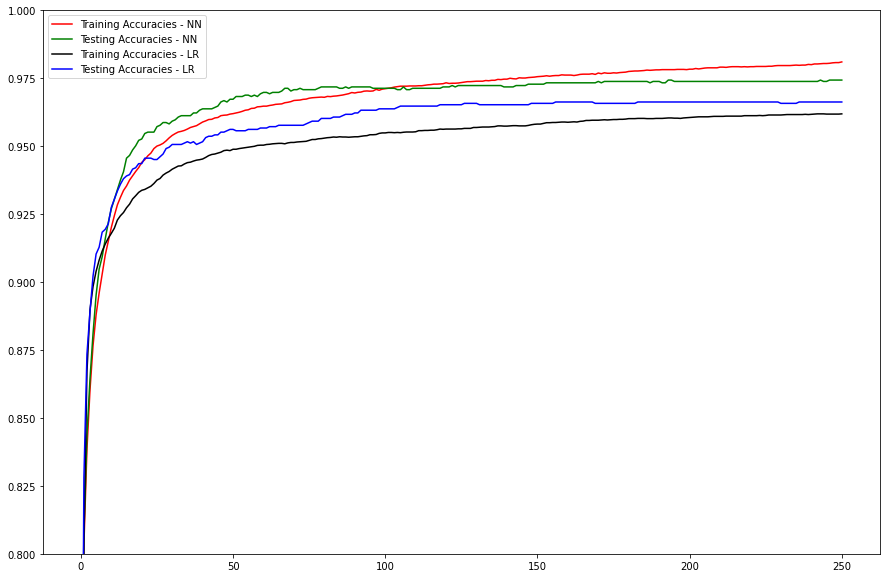

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

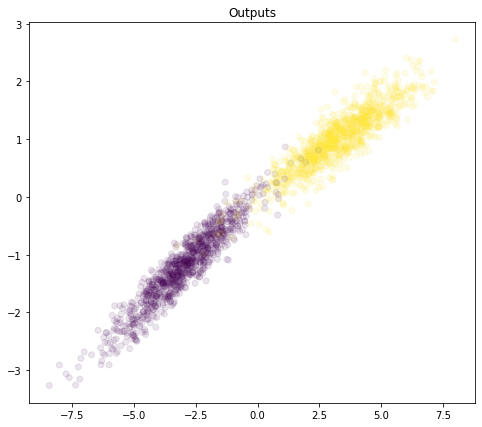

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

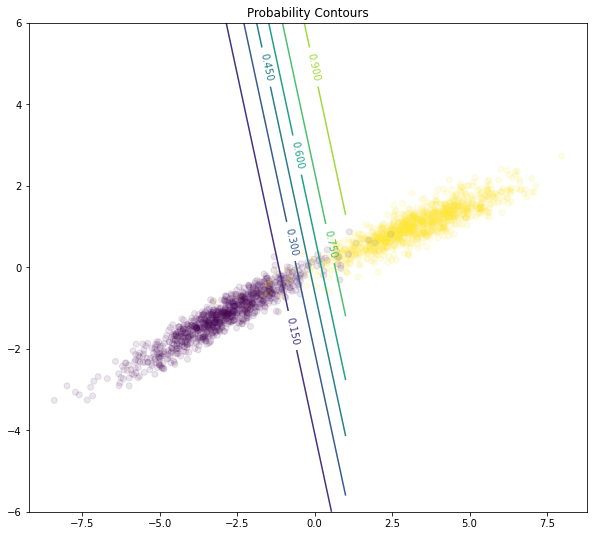

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );